<a href="https://colab.research.google.com/github/SuhelAnsari9272/Telecom-Churn-Analysis/blob/main/Telecom_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom Churn Analysis

* To understand the behaviour of Churned customers. To create a model that can classify and predict the probability of Churning

### Importing Required packeges and loading data

In [114]:
# required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px


In [115]:
#Connect with google drive
#Reading the data
data = pd.read_csv('D:\git_project\Telecom-Churn-Analysis\Dataset.csv')

In [116]:
#Data overview
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [117]:
data.tail()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0
3332,0,74,1,1,3.70,0,234.4,113,100.0,13.30,13.7


In [118]:
#Shape of the dataset
data.shape

(3333, 11)


#### Data Description

<b> Churn </b>: 1 if customer cancelled service, 0 if not (Target)  \
<b> AccountWeeks </b> : number of weeks customer has had active account  \
<b> ContractRenewal </b>: 1 if customer recently renewed contract, 0 if not  \
<b> DataPlan </b>: 1 if customer has data plan, 0 if not  \
<b> DataUsage </b>: gigabytes of monthly data usage  \
<b> CustServCalls </b>: number of calls into customer service  \
<b> DayMins </b> : average daytime minutes per month  \
<b> DayCalls </b> : average number of daytime calls  \
<b> MonthlyCharge </b> : average monthly bill  \
<b> OverageFee </b> : largest overage fee in last 12 months  \
<b> RoamMins </b>  : average number of roaming minutes  


In [119]:
#Discrete and Continious columns
columns = data.columns

discrete_columns = ['Churn','ContractRenewal','DataPlan','CustServCalls']
continous_columns = [column for column in columns if column not in discrete_columns]


In [120]:
#Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


* The data is cleaned there is no null values present in the dataset

In [121]:
#Data description
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,3333.0,0.144914,0.352067,0.0,0.00,0.00,0.00,1.00
AccountWeeks,3333.0,101.064806,39.822106,1.0,74.00,101.00,127.00,243.00
ContractRenewal,3333.0,0.903090,0.295879,0.0,1.00,1.00,1.00,1.00
DataPlan,3333.0,0.276628,0.447398,0.0,0.00,0.00,1.00,1.00
DataUsage,3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
CustServCalls,3333.0,1.562856,1.315491,0.0,1.00,1.00,2.00,9.00
DayMins,3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
DayCalls,3333.0,100.435644,20.069084,0.0,87.00,101.00,114.00,165.00
MonthlyCharge,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
OverageFee,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19


* We have active account for 1 week  to 243 weeks.
* The monthly mean data usage is 0.82 GB.
* Maximum customer service call is of 9 times.
* Approx 180 mins is being called by customer in a month.
* On an average 100 Calls is made in a month.
* The monthly mean charge is of 56 units.
* The mean overage fee is of 10 units and Maximum is of 18 units.
* Mean roaming minutes in a months is 10 mins.

### Exploratory Data Analysis

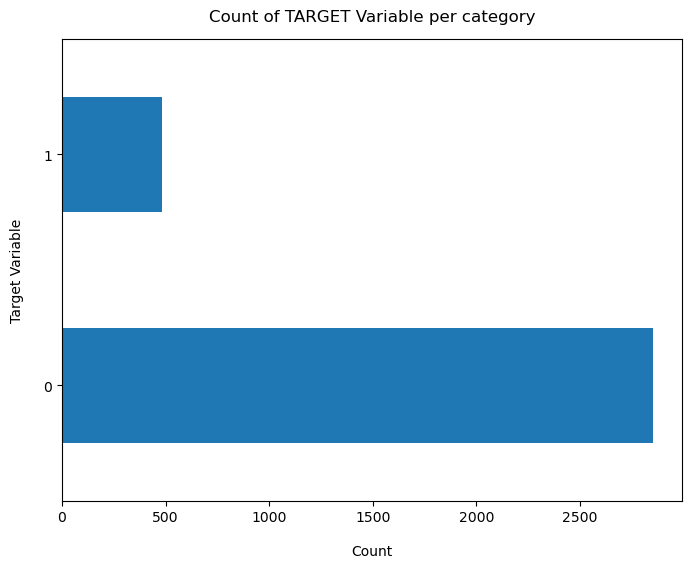

In [122]:
#Distribution of Churn 
data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [123]:
#percentage of churn  or not
data['Churn'].value_counts() / len(data['Churn'])

0    0.855086
1    0.144914
Name: Churn, dtype: float64

* Highly unbalanced data , as we have 86% of customers who have not churned and 14 % customers who have churned.

In [124]:
#Creating a copy of the data 
df = data.copy()

<Axes: xlabel='ContractRenewal', ylabel='count'>

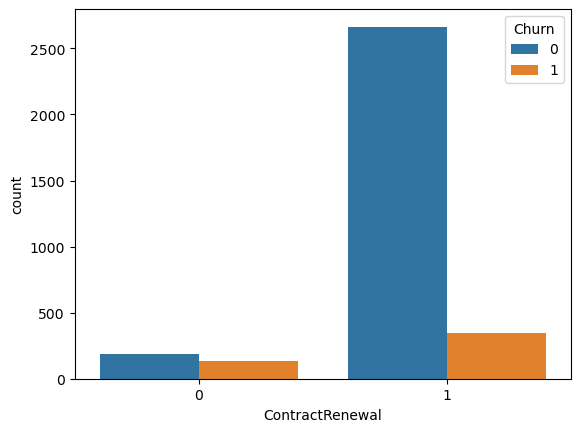

In [125]:
#Churn distribution for different Contract Renewal
sns.countplot(data = df, x = df['ContractRenewal'], hue = 'Churn')

* The rate of churning is high for those customers who have not made Contract Renewal

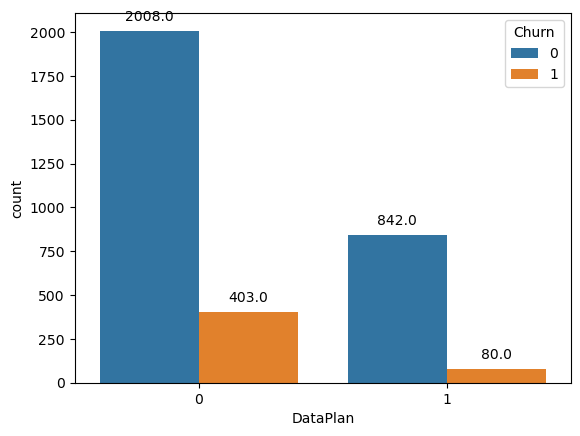

In [126]:
#Distribution of Churn with respect to different Data Plans
ax = sns.countplot(data=df, x='DataPlan', hue='Churn')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

* The churning rate is high for those customers who have not opted for DataPlan.

<Axes: xlabel='CustServCalls', ylabel='count'>

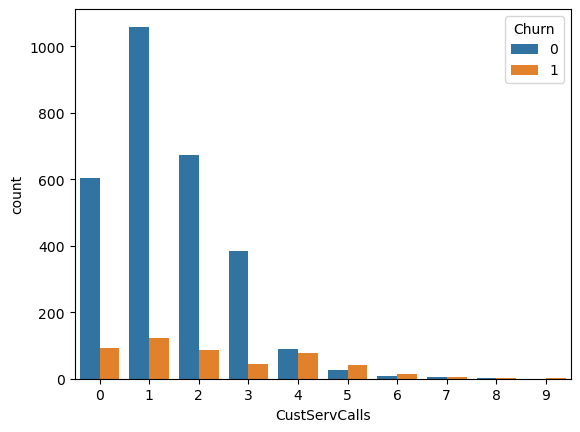

In [127]:
#Distribution of  Churning for different Customer Service Calls 
sns.countplot(data = df, x = df['CustServCalls'], hue = 'Churn')

* The churning rate is seems to increase for customer service calls increases

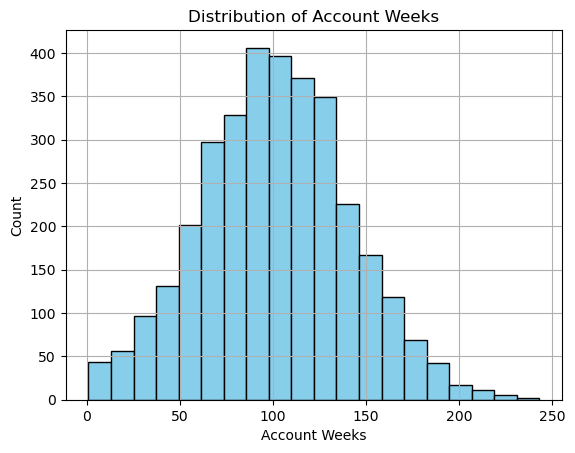

In [128]:
import matplotlib.pyplot as plt

# Plotting the distribution of AccountWeeks
plt.hist(df['AccountWeeks'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Account Weeks')
plt.ylabel('Count')
plt.title('Distribution of Account Weeks')
plt.grid(True)
plt.show()


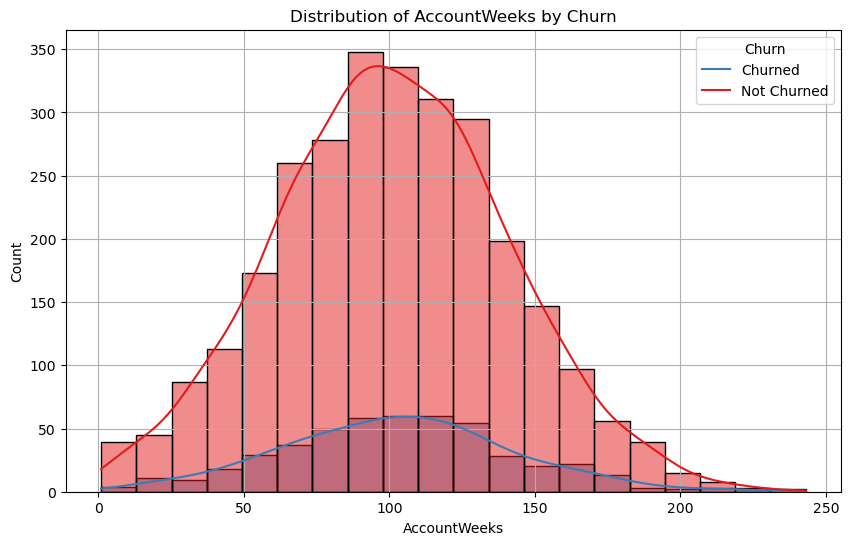

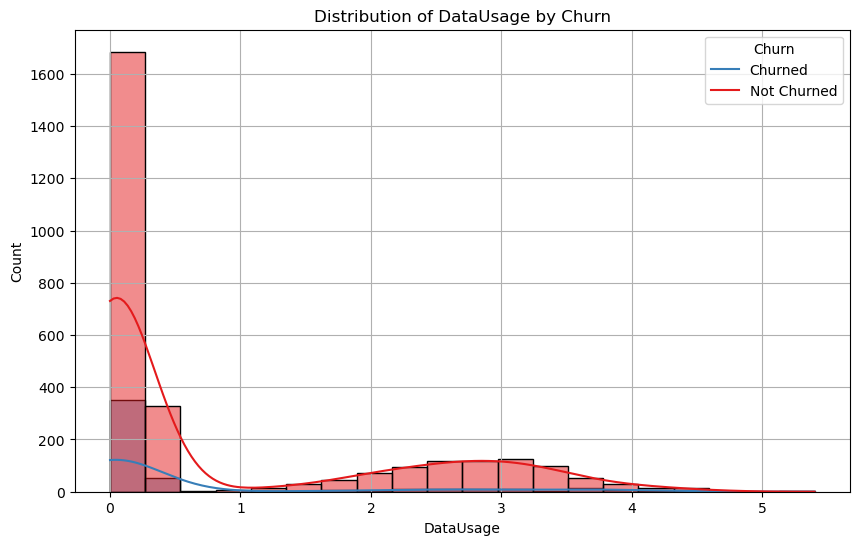

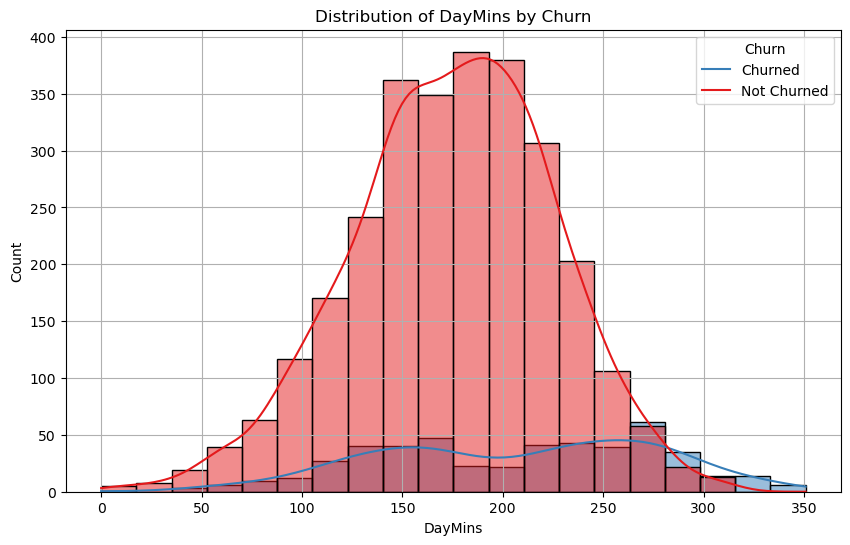

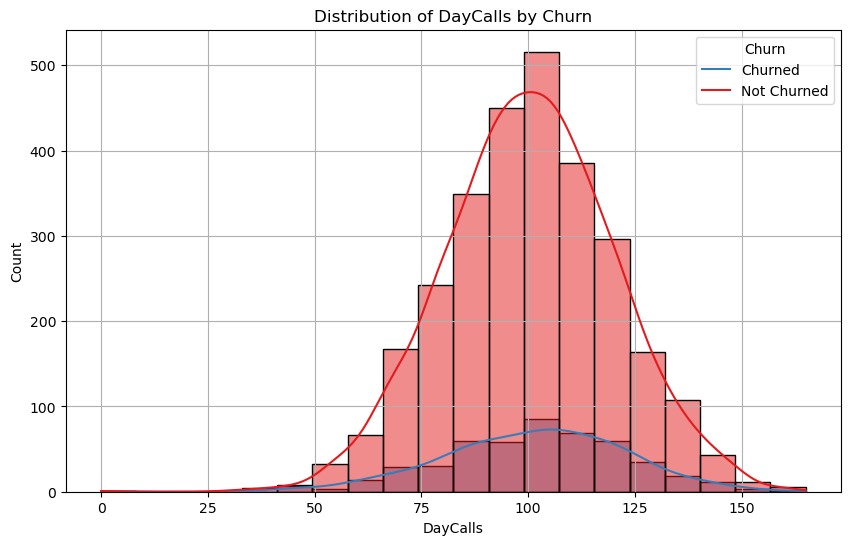

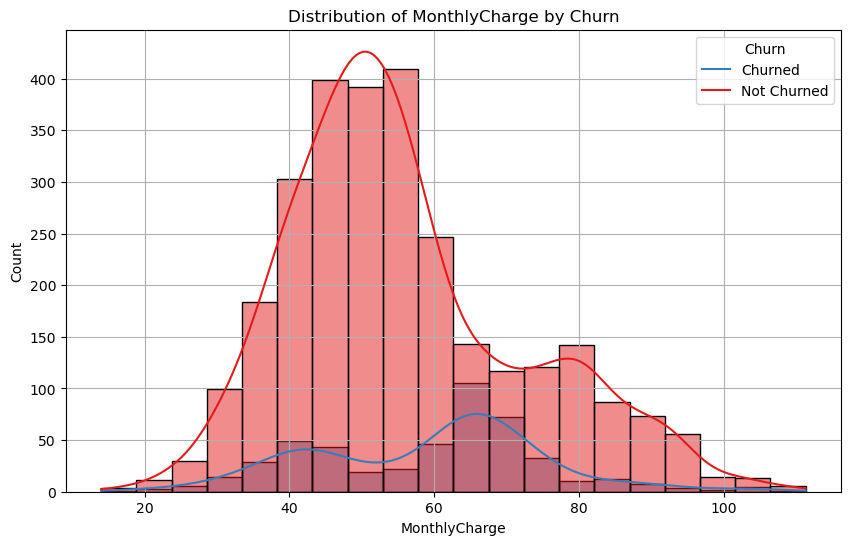

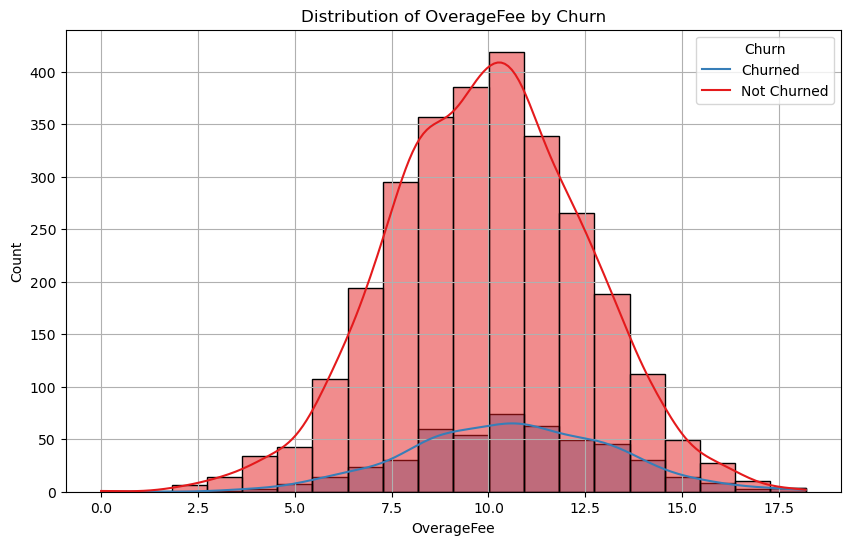

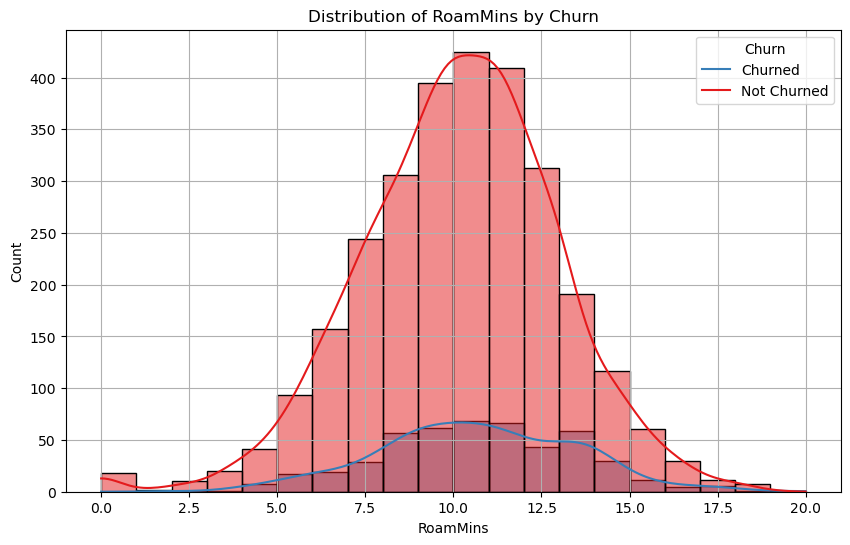

In [129]:
# Plotting the distribution of AccountWeeks with respect to Churn
for column in continous_columns:
  plt.figure(figsize=(10, 6))
  sns.histplot(data=df, x= column , hue='Churn', bins=20, kde=True, palette='Set1', edgecolor='black')
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.title(f'Distribution of {column} by Churn')
  plt.grid(True)
  plt.legend(title='Churn', labels=['Churned', 'Not Churned'])
  plt.show()

* The number of churn customers is high for those who use less data.
* The churned customers has the day time call mins higher.
* We can group the average weeks and the monthly charge column for better analysis.

### Feature Engineering 

In [130]:
#binning Customers for different time period
df['AccountWeeksGroup'] = pd.cut(df['AccountWeeks'], bins=[0, 50, 100, 150, 200, 250], labels=['< 1yr', '1-2yrs', '2-3yrs', '3-4yr', '4+'])

<Axes: xlabel='AccountWeeksGroup', ylabel='count'>

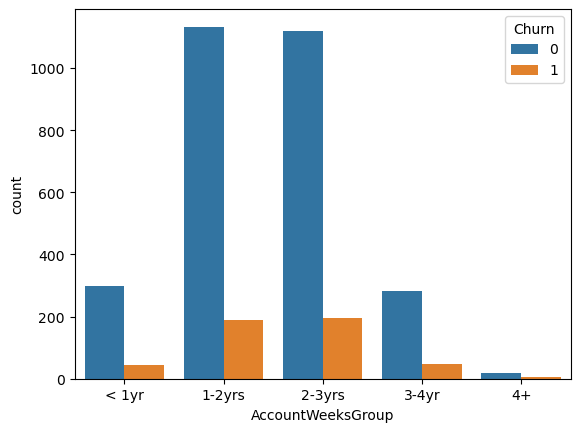

In [131]:
# Distribution of Churn for different time periods
sns.countplot(data =df, x = 'AccountWeeksGroup', hue = 'Churn')

* The churn rate is high for those customer who has active account for 2-3 yrs.
* This clearly shows that there is some services issue due to customers are churning. we can see how different columns are associated with different time.

<Axes: xlabel='AccountWeeksGroup', ylabel='MonthlyCharge'>

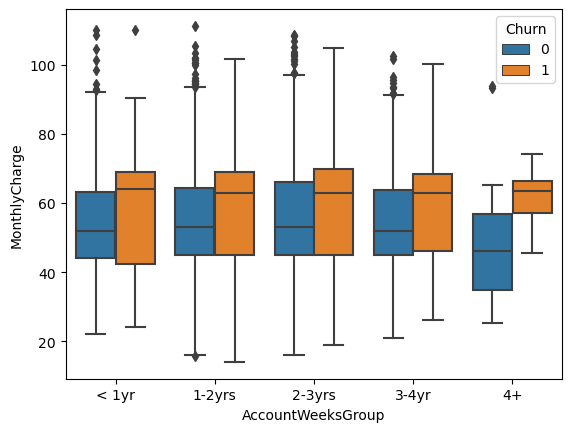

In [132]:
#Distibution of Monthly Charge for different time periods
sns.boxplot(data =  df, x = 'AccountWeeksGroup', y = 'MonthlyCharge', hue = 'Churn')

* Churned customers were monthly charged same as non-churned customers.
* For long time users, the monthly charged is higher than non-churned customers.

<Axes: xlabel='AccountWeeksGroup', ylabel='DataUsage'>

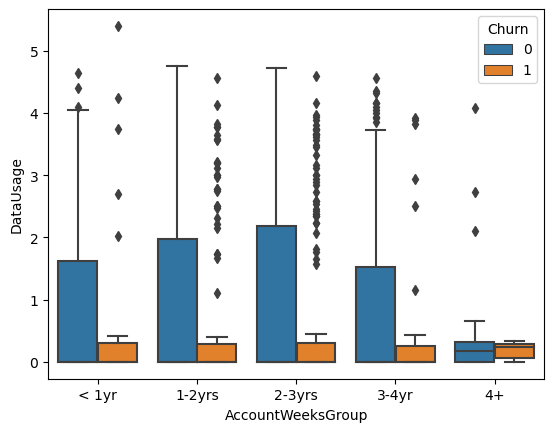

In [133]:
# Distibution of Data Usage for different time periods
sns.boxplot(data =  df, x = 'AccountWeeksGroup', y = 'DataUsage', hue = 'Churn')

* The churned customers were not using the data services on large scale

<Axes: xlabel='AccountWeeksGroup', ylabel='DayCalls'>

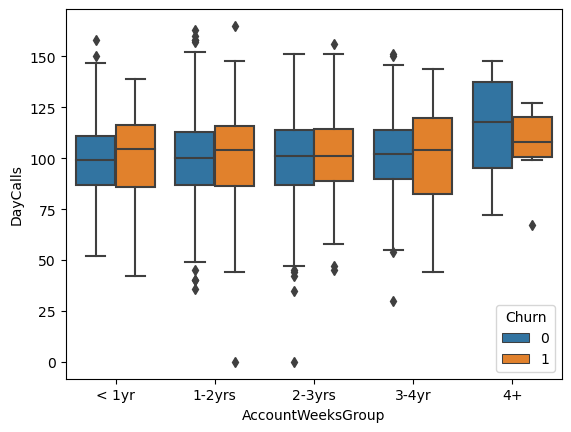

In [134]:
#  Distibution of number of calls in a month for different time periods
sns.boxplot(data =  df, x = 'AccountWeeksGroup', y = 'DayCalls', hue = 'Churn')

* Average number of day time calls is same for churned and non-churned customers.

<Axes: xlabel='AccountWeeksGroup', ylabel='DayMins'>

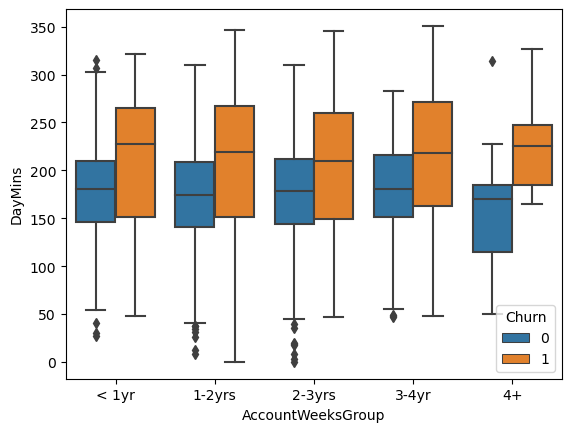

In [135]:
## Distibution of Day Mins  for different time periods
sns.boxplot(data =  df, x = 'AccountWeeksGroup', y = 'DayMins', hue = 'Churn')

* The averege day time minutes is high for churned customers.
* So long time callers users are more likely to churn

In [163]:
df['DayCalls'].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: DayCalls, dtype: float64

In [166]:
# Binning the Customers for different number of Calls made in month
df['DayCallsGroup'] = pd.cut(df['DayCalls'], bins=[-1, 50, 80, 110, 140, 250], labels=['< 50', '50-80', '80-110', '110-140', '140+'])

<Axes: xlabel='DayCallsGroup', ylabel='count'>

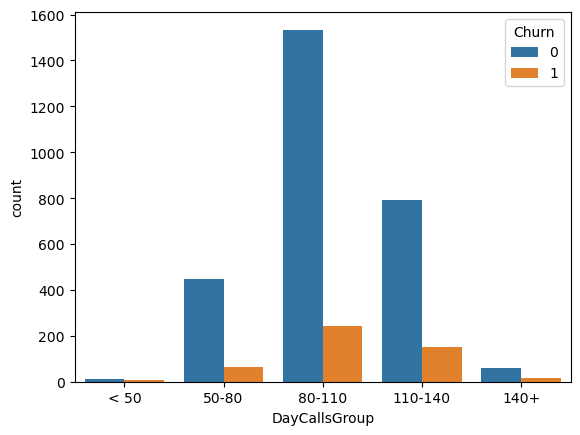

In [137]:
# Distribution of Churning for different number of calls made
sns.countplot(data =df, x = 'DayCallsGroup', hue = 'Churn')

* Churning is high for  those customers who have average number of calls group around 100 in a month.

In [138]:
# Distibution of Day Mins  for different number of calls
fig = px.box(df, x = 'DayCallsGroup', y = 'DayMins', color = 'Churn',)
fig.show()

* The customers who make long duration calls are churning.
* For higher Day Mins value we have high customer Churn.
* We can analyze this using the AccountWeeksGroup for better understanding.


In [139]:
# Distibution of Monthly charge for different number of calls
fig = px.box(df, x = 'DayCallsGroup', y = 'MonthlyCharge', color = 'Churn')
fig.show()

* Customers who make more calls in a month have monthly charges is high for churning customers.

In [140]:
# Distibution of RoamMins  for different number of calls
fig = px.box(df, x = 'DayCallsGroup', y = 'RoamMins', color = 'Churn')
fig.show()

* RoamMins do not seems to have a churning factor for customers with different Day Calls Group

In [141]:
# Distibution of OVerage for different number of calls
fig = px.box(df, x = 'DayCallsGroup', y = 'OverageFee', color = 'Churn')
fig.show()

* Overage Fee is high for Customers with high number of calls are more likely to churn

In [174]:
# Binning the customers for different duration of calls made
df['DayMinsGroup'] = pd.cut(df['DayMins'], bins=[-1, 120, 240, 400], labels=['short', 'average','long'])

<Axes: xlabel='DayMinsGroup', ylabel='count'>

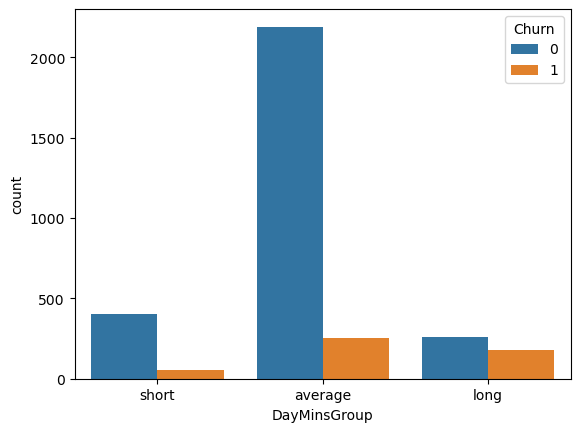

In [175]:
#Distribution of Churn for different durations of call made
sns.countplot(data =df, x = 'DayMinsGroup', hue = 'Churn')

* Churning rate is high for those customers who makes long duration calls

In [144]:
# Distibution of Monthly charge for different duration of calls
fig = px.box(df, x = 'DayMinsGroup', y = 'MonthlyCharge', color = 'Churn')
fig.show()

* Monthly charge does not seems to be a significant factor for churning , as the Monthly charges are similiar or less for churning customers.

In [145]:
# Distibution of Time period of active customer for different duration of calls
fig = px.box(df, x = 'DayMinsGroup', y = 'AccountWeeks', color = 'Churn')
fig.show()

* The long  duration is not a factor for churning of customers with respect to daymins call.

In [146]:
# # Distibution of Data Usage for different duration of calls
fig = px.box(df, x = 'DayMinsGroup', y = 'DataUsage', color = 'Churn')
fig.show()

* Data usage is less for churning customers , with respect to different monthly calls.

In [147]:
df['CustServCalls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: CustServCalls, dtype: int64

In [148]:
# Grouping the custServCalls to understand clearly
df['CustServCallsGroup'] = pd.cut(df['CustServCalls'], bins=[-1,1,3, 10], labels=['0-1', '2-3', '>3'])

<Axes: xlabel='CustServCallsGroup', ylabel='count'>

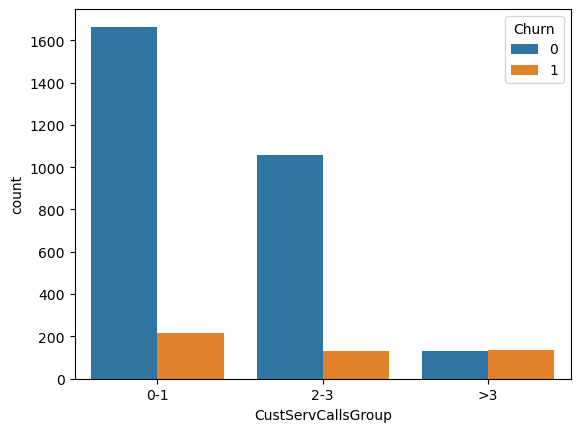

In [149]:
sns.countplot(data = df, x = 'CustServCallsGroup', hue = 'Churn')

* Customers who are callig for the service for more than 3 times are more likely to churn

In [150]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,AccountWeeksGroup,DayCallsGroup,DayMinsGroup,CustServCallsGroup
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,2-3yrs,80-110,long,0-1
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,2-3yrs,110-140,average,0-1
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,2-3yrs,110-140,long,0-1
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,1-2yrs,50-80,long,2-3
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,1-2yrs,110-140,average,2-3


### Correlation

C:\Users\Suhel Ansari\AppData\Local\Temp\ipykernel_13912\1452775231.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

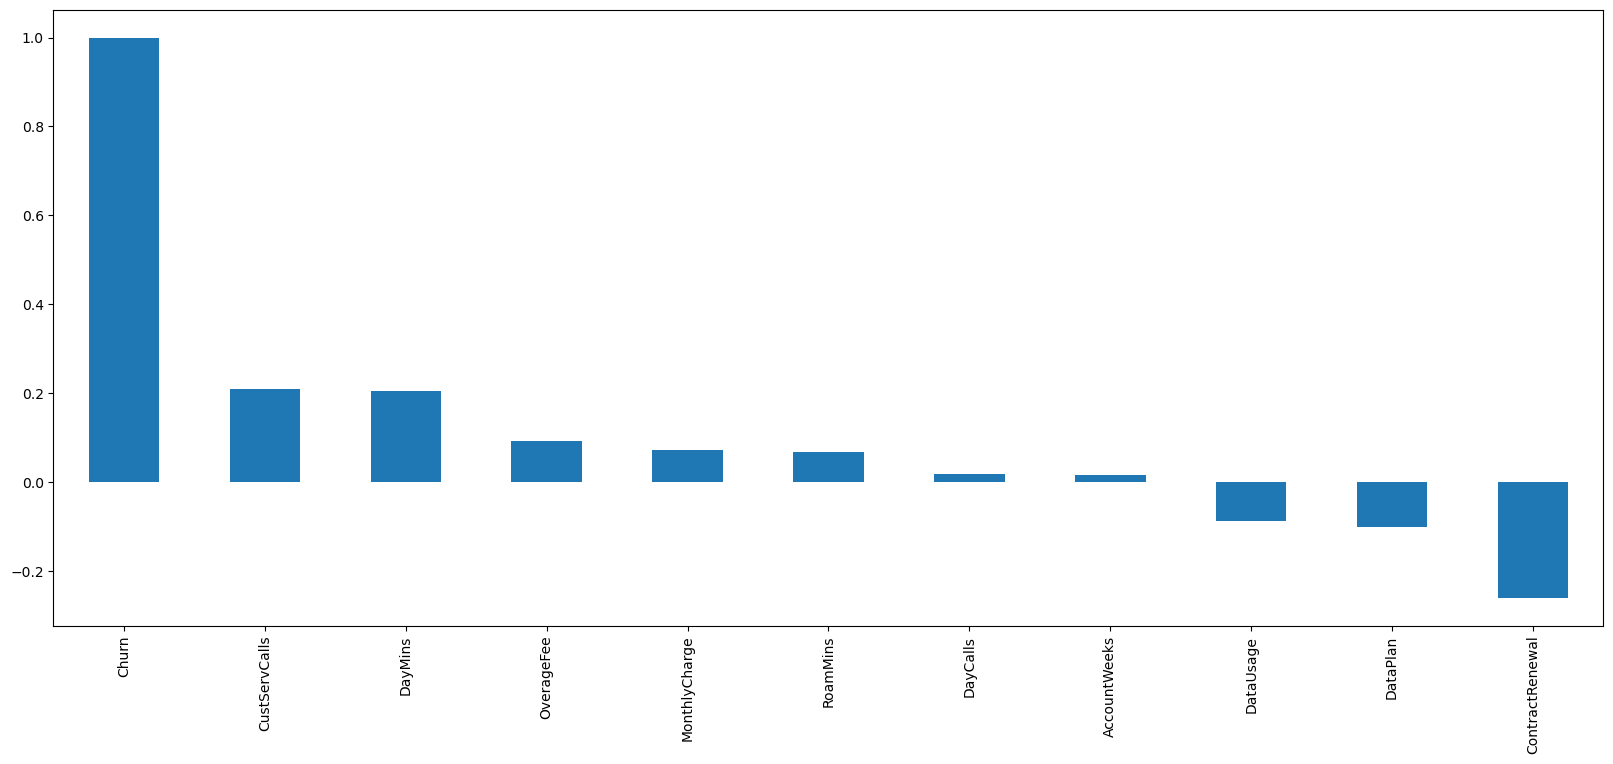

In [151]:
plt.figure(figsize=(20,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

C:\Users\Suhel Ansari\AppData\Local\Temp\ipykernel_13912\1547377726.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

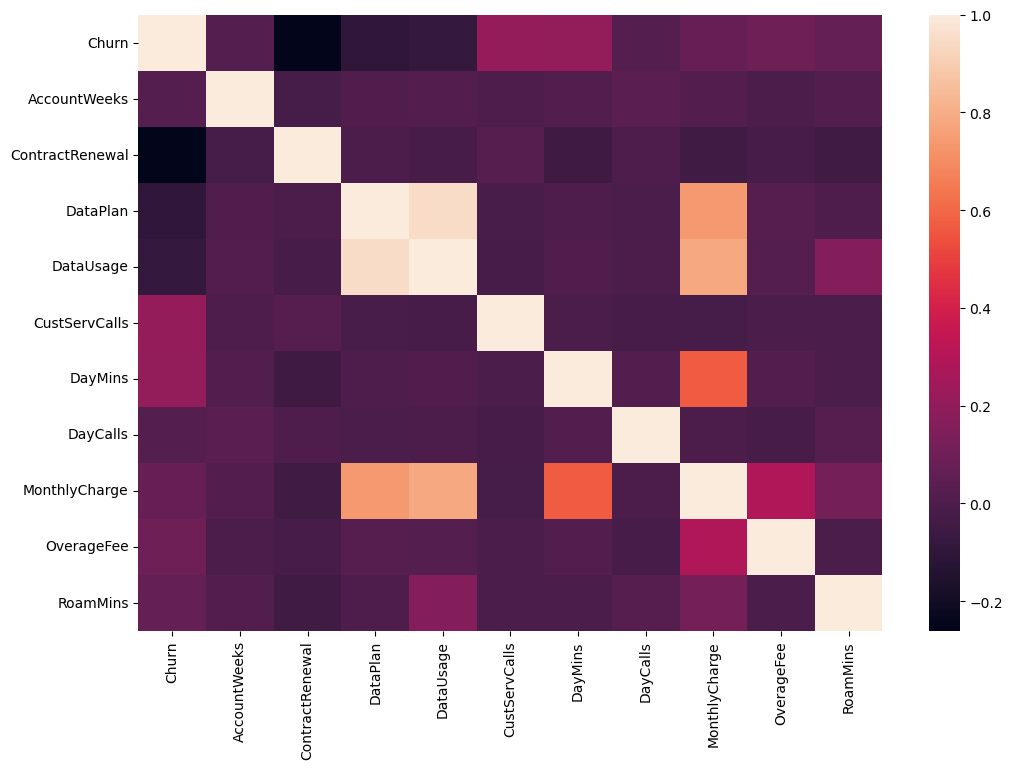

In [152]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

* For low Contract Renewal there is higher Churning.
* As the Day Mins, Data  and Usage  increases the Monthly charges also increses.

In [112]:
pd.set_option('display.max_columns', None)

In [157]:
df_encoded = df.copy()

In [159]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Dictionary to store mappings of original categories to encoded values
encoding_map = {}

# Apply label encoding to each categorical column
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'category':  # Check if the column contains categorical data
        encoded_values = label_encoder.fit_transform(df_encoded[column])
        df_encoded[column] = encoded_values
        # Create mapping of original categories to encoded values
        encoding_map[column] = {category: encoded_value for category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

# Display the mapping of original categories to encoded values
for column, mapping in encoding_map.items():
    print(f"Column: {column}, Encoding Map: {mapping}")

# Display the DataFrame after label encoding
#print(df.head())


Column: AccountWeeksGroup, Encoding Map: {'1-2yrs': 0, '2-3yrs': 1, '3-4yr': 2, '4+': 3, '< 1yr': 4}
Column: DayCallsGroup, Encoding Map: {'110-140': 0, '140+': 1, '50-80': 2, '80-110': 3, '< 50': 4, nan: 5}
Column: DayMinsGroup, Encoding Map: {'average': 0, 'long': 1, 'short': 2, nan: 3}
Column: CustServCallsGroup, Encoding Map: {'0-1': 0, '2-3': 1, '>3': 2}


In [185]:
#data overview
df_encoded.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,AccountWeeksGroup,DayCallsGroup,DayMinsGroup,CustServCallsGroup
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,1,3,1,0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,1,0,0,0
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,1,0,1,0
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,0,2,1,1
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,0,0,0,1


In [178]:
#Original shape of the data
data.shape

(3333, 11)

In [179]:
#new Shape of the dataset
df_encoded.shape

(3333, 15)

In [182]:
#Exporting the dataframe into a csv file
df_encoded.to_csv('telecom_df.csv')